In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.feature_selection import RFE

In [6]:
data = pd.read_csv('social_network.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [8]:
X = data.iloc[:, [2]].values
X

array([[19],
       [35],
       [26],
       [27],
       [19],
       [27],
       [27],
       [32],
       [25],
       [35],
       [26],
       [26],
       [20],
       [32],
       [18],
       [29],
       [47],
       [45],
       [46],
       [48],
       [45],
       [47],
       [48],
       [45],
       [46],
       [47],
       [49],
       [47],
       [29],
       [31],
       [31],
       [27],
       [21],
       [28],
       [27],
       [35],
       [33],
       [30],
       [26],
       [27],
       [27],
       [33],
       [35],
       [30],
       [28],
       [23],
       [25],
       [27],
       [30],
       [31],
       [24],
       [18],
       [29],
       [35],
       [27],
       [24],
       [23],
       [28],
       [22],
       [32],
       [27],
       [25],
       [23],
       [32],
       [59],
       [24],
       [24],
       [23],
       [22],
       [31],
       [25],
       [24],
       [20],
       [33],
       [32],
       [34],
       [18],

In [10]:
y = data.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
print('Predicted Value')
y_pred = logreg.predict(X_test)
print(y_pred[:10])
print('Actual Value')
print(y_test[:10])

Predicted Value
[0 0 0 0 0 0 0 0 0 1]
Actual Value
[0 0 0 0 0 0 0 1 0 0]


In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[57  1]
 [ 4 18]]


In [23]:
TN, FP, FN, TP = metrics.confusion_matrix(list(y_test), list(y_pred), labels=[0, 1]).ravel() #0,1 is default label of sklearn 
print("True Negatives", TN)
print("True Positives", TP)
print("False Positives", FP)
print("False Negatives", FN)


True Negatives 57
True Positives 18
False Positives 1
False Negatives 4


In [24]:
results={} #To Store all the metrics Result Values

In [25]:
#Finding Accuracy 
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}") #Note the Formatting with f"{metric} and rounding to 3 decimal points with .3f

ACC is  0.938


In [26]:
#Finding True Negative Rate
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.983


In [27]:
#Finding Precision Predictive Value
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.947


In [28]:
#Finding Negative Predictive Value
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  0.934


In [29]:
#Finding True Postive Rate
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")


TPR is  0.818


In [30]:
#Finding F1-Score
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.878


In [31]:
#Finding MCC Value
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.840


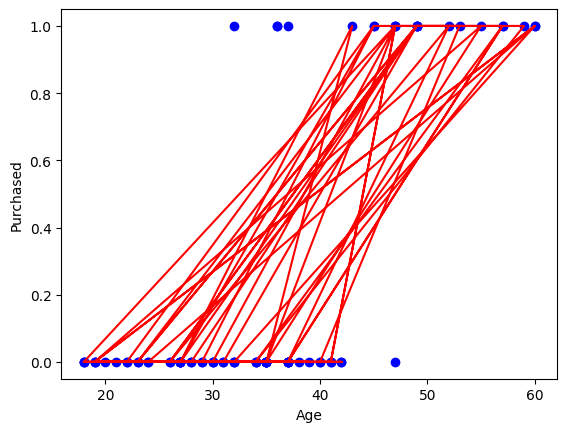

In [44]:
plt.scatter(X_test,y_test, color = 'b')
plt.plot(X_test,logreg.predict(X_test),color = 'r')
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.show()

In [47]:
y_proba = logreg.predict_proba(X_test)
print("Probability of not purchased & probability of purchased. ", y_proba[:5])
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))
print("2D to 1D reshaped Probability of Purchased. ", y_proba[:5])

Probability of not purchased & probability of purchased.  [[0.89588762 0.10411238]
 [0.68568636 0.31431364]
 [0.78493273 0.21506727]
 [0.89588762 0.10411238]
 [0.78493273 0.21506727]]
2D to 1D reshaped Probability of Purchased.  [0.10411238 0.31431364 0.21506727 0.10411238 0.21506727]
